# Lab work 5
## Numerical solving of ordinary differential equations

## 1. Explicit Euler method

We consider an ordinary differential equation $ y' = f(x, y), y(0) = y_0 $ on an interval $[0, b]$  
The simplest method is to split the interval into a grid $\{x_i\}$ and make a grid function $y(x_i) = y_i$:
$$ \frac{y_{i+1}-y_i}{x_{i+1}-x_i} = f(x_i, y_i) $$  
$$ y_{i+1} = y_i + f(x_i, y_i)(x_{i+1}-x_i) $$
It is called Euler explicit method.

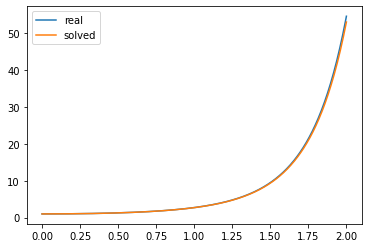

accuracy =  1.5690330964767725


In [2]:
import numpy as np
import matplotlib.pyplot as plt 

def explEuler(x, y0, func):
    n = len(x)
    y = []
    y.append(y0)
    for i in range(1, n):
        y.append(y[i-1] + func(x[i-1], y[i-1])*(x[i]-x[i-1]))
    return y

func = lambda x, y: x*y
y0 = 1
a = 0
b = 2
n = 500
x = np.linspace(a, b, n)
y = explEuler(x, y0, func)
plt.plot(x, np.exp(x**2), label='real')
plt.plot(x, y, label='solved')
plt.legend()
plt.show()
print("accuracy = ", max(abs(y - np.exp(x**2/2))))

## 1.1 Accuracy

Order of accuracy =  0.9563506179276037


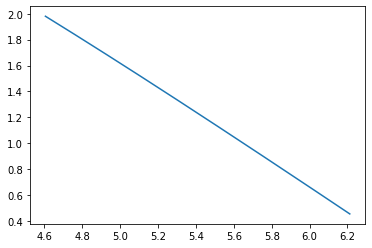

In [3]:
index = np.log([i for i in range(100, n)])
value = np.log([max(abs(explEuler(np.linspace(a, b, i), y0, func)-np.exp(np.linspace(a, b, i)**2))) for i in range(100, n)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 2. Implicit Euler method

This method changes the formula slightly: 
$$ \frac{y_{i+1}-y_i}{x_{i+1}-x_i} = f(x_{i+1}, y_{i+1}) $$  
$$ y_{i+1} = y_i + f(x_{i+1}, y_{i+1})(x_{i+1}-x_i) $$
It is a non-linear equation, that can be solved with using methods from previous labs.

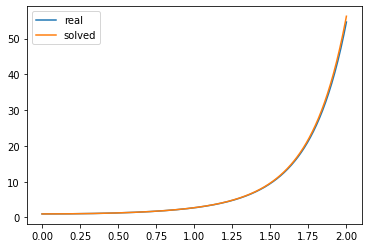

accuracy =  1.6223429816479111


In [4]:
def Newton(f, der, a, eps):
    x = a
    x_old = 0
    counter = 0
    while True:
        if counter > 1000:
            print("the method diverges")
            return None
        
        if der(x) == 0:
            print("derivative = 0")
            return (x, 0)
        
        x_new = x - f(x) / der(x)
        if abs(f(x)) < eps:
            break
            
        x_old = x
        x = x_new
        counter += 1
    
    q = (x_new - x)/(x - x_old)
    p = 1 / (1-q)
    return (x, p)

def implEuler(x, y0, func, deriv):
    n = len(x)
    y = []
    y.append(y0)
    for i in range(1, n):
        f = lambda z: z - y[i-1] - func(x[i], z)*(x[i]-x[i-1])
        der = lambda z: 1 - deriv(x[i], z)*(x[i]-x[i-1])
        yi, p = Newton(f, der, y0, 1e-5)
        y.append(yi)
    return y

func = lambda x, y: 2*x*y
deriv_y = lambda x, y: x
y0 = 1
a = 0
b = 2
n = 500
x = np.linspace(a, b, n)
y = implEuler(x, y0, func, deriv_y)
plt.plot(x, np.exp(x**2), label='real')
plt.plot(x, y, label='solved')
plt.legend()
plt.show()
print("accuracy = ", max(abs(y - np.exp(x**2))))

## 2.1 Accuracy

Order of accuracy =  1.0641114253792823


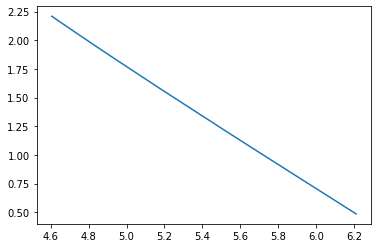

In [5]:
index = np.log([i for i in range(100, n)])
value = np.log([max(abs(implEuler(np.linspace(a, b, i), y0, func, deriv_y)-np.exp(np.linspace(a, b, i)**2))) for i in range(100, n)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 3. Euler method with recalculation

This method changes the formula slightly: 
$$ \frac{y_{i+1}-y_i}{x_{i+1}-x_i} = f(x_{i+1}, y_{i+1}) $$  
$$ y_{i+1} = y_i + f(x_{i+1}, y_{i+1})(x_{i+1}-x_i), $$  
where $f(x_{i+1}, y_{i+1})$ will be calculated individually:  
$$ y^*_{i+1} = y_i + (x_{i+1}-x_{i})f(x_i, y_i) $$
$$ y_{i+1} = y_i + (x_{i+1}-x_{i}) \frac{f(x_i, y_i)+f(x_{i+1}, y^*_{i+1})}{2} $$

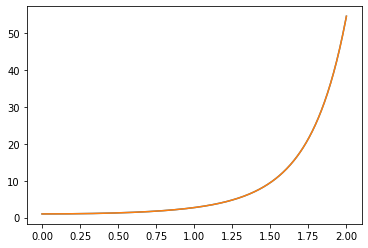

accuracy =  0.004636259766677142


In [6]:
def recalcEuler(x, y0, func):
    n = len(x)
    y = []
    y.append(y0)
    for i in range(1, n):
        y_ = y[i-1] + func(x[i-1], y[i-1])*(x[i]-x[i-1])
        y.append(y[i-1] + (func(x[i-1], y[i-1]) + func(x[i], y_))*(x[i]-x[i-1])/2)
    return y

func = lambda x, y: 2*x*y
y0 = 1
a = 0
b = 2
n = 500
x = np.linspace(a, b, n)
y = recalcEuler(x, y0, func)
plt.plot(x, np.exp(x**2), label='real')
plt.plot(x, y, label='solved')
plt.show()
print("accuracy = ", max(abs(y - np.exp(x**2))))

## 3.1 Accuracy

Order of accuracy =  1.9633883615913297


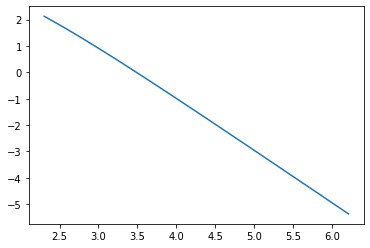

In [7]:
index = np.log([i for i in range(10, n)])
value = np.log([max(abs(recalcEuler(np.linspace(a, b, i), y0, func)-np.exp(np.linspace(a, b, i)**2))) for i in range(10, n)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()

## 4. 4-order Runge–Kutta method 

This method use the following recursive formula:
$$ y_{i+1} = y_i + \frac{h_i}{6} (k_1 + 2k_2 + 2k_3 + k_4) $$  
where $$ h_i = x_{i+1}-x_i $$
$$ k_1 = f(x_i, y_i), $$ 
$$ k_2 = f(x_i + \frac{h_i}{2}, y_i + \frac{h_i}{2} k_1) $$
$$ k_3 = f(x_i + \frac{h_i}{2}, y_i + \frac{h_i}{2} k_2) $$
$$ k_4 = f(x_i + h_i, y_i + h_i k_3) $$

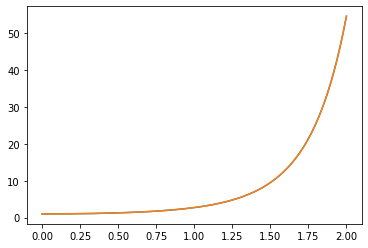

accuracy =  3.964517958365832e-08


In [8]:
def RungeKutta(x, y0, func):
    n = len(x)
    y = []
    y.append(y0)
    for i in range(1, n):
        h = x[i]-x[i-1]
        k1 = func(x[i-1], y[i-1])
        k2 = func(x[i-1]+h/2, y[i-1]+h*k1/2)
        k3 = func(x[i-1]+h/2, y[i-1]+h*k2/2)
        k4 = func(x[i-1]+h, y[i-1]+h*k3)
        y.append(y[i-1] + h/6*(k1+2*k2+2*k3+k4))
    return y

func = lambda x, y: 2*x*y
y0 = 1
a = 0
b = 2
n = 500
x = np.linspace(a, b, n)
y = RungeKutta(x, y0, func)
plt.plot(x, np.exp(x**2), label='real')
plt.plot(x, y, label='solved')
plt.show()
print("accuracy = ", max(abs(y - np.exp(x**2))))

## 4.1 Accuracy

Order of accuracy =  3.979943812663295


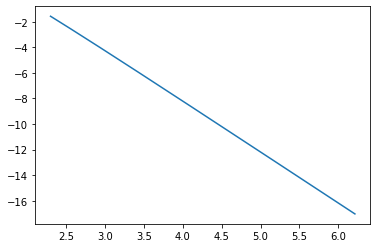

In [9]:
index = np.log([i for i in range(10, n)])
value = np.log([max(abs(RungeKutta(np.linspace(a, b, i), y0, func)-np.exp(np.linspace(a, b, i)**2))) for i in range(10, n)])
a1, b1 = np.polyfit(index, value, 1)
print("Order of accuracy = ", -a1)
plt.plot(index, value)
plt.show()